In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


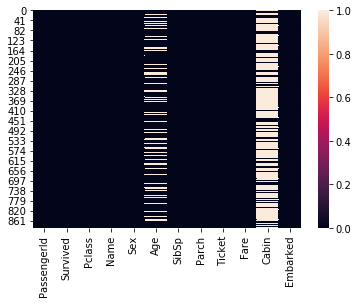

In [4]:
sns.heatmap(train.isnull())

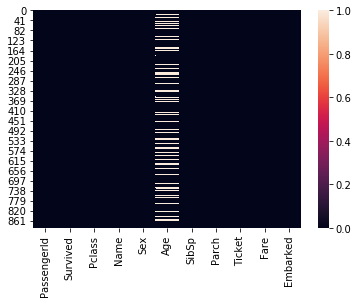

In [5]:
train.drop('Cabin', axis=1, inplace=True)
sns.heatmap(train.isnull())

In [6]:
#Categorical data 
Sex = pd.get_dummies(train['Sex'], drop_first=True)
Embarked = pd.get_dummies(train['Embarked'], drop_first=True)
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)
train = pd.concat([train, Sex, Embarked], axis=1)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [8]:
train.drop('Name', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,35.0,0,0,373450,8.0500,1,0,1


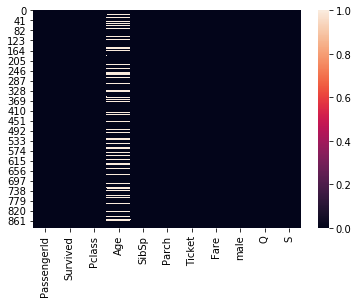

In [9]:
sns.heatmap(train.isnull())

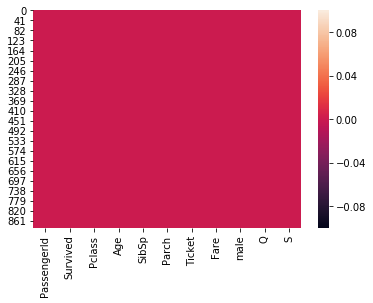

In [10]:
train.fillna(0, inplace=True)
sns.heatmap(train.isnull())

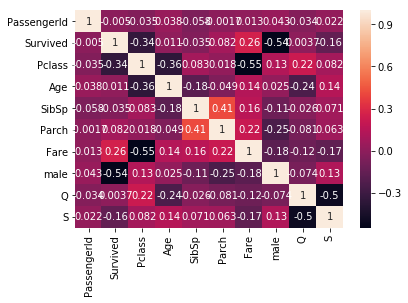

In [11]:
#Everything is numeric now, checking correlation
sns.heatmap(train.corr(), annot=True)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,35.0,0,0,373450,8.0500,1,0,1


In [13]:
from sklearn.cross_validation import train_test_split

/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
X = train[['Pclass', 'Fare', 'male']]
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
X.head()

,Pclass,Fare,male
0,3,7.2500,1
1,1,71.2833,0
2,3,7.9250,0
3,1,53.1000,0
4,3,8.0500,1


In [16]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
y_pred_train = model.predict(X_test) 
y_pred_train

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1])

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred_train.round()))
print(classification_report(y_test, y_pred_train.round()))
print(accuracy_score(y_test, y_pred_train.round()))


[[152  23]
 [ 36  84]]
             precision    recall  f1-score   support

          0       0.81      0.87      0.84       175
          1       0.79      0.70      0.74       120

avg / total       0.80      0.80      0.80       295

0.8


In [21]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


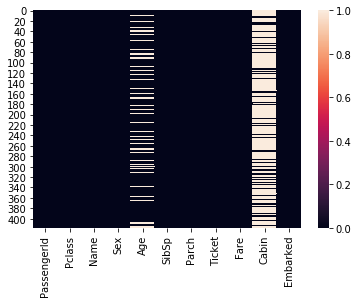

In [23]:
sns.heatmap(test.isnull())

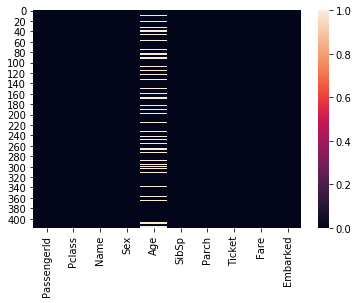

In [24]:
test.drop('Cabin', axis=1, inplace=True)
sns.heatmap(test.isnull())

In [25]:
#Categorical data 
Sex = pd.get_dummies(test['Sex'], drop_first=True)
Embarked = pd.get_dummies(test['Embarked'], drop_first=True)
test.drop(['Sex', 'Embarked'], axis=1, inplace=True)
test = pd.concat([test, Sex, Embarked], axis=1)

In [26]:
test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1


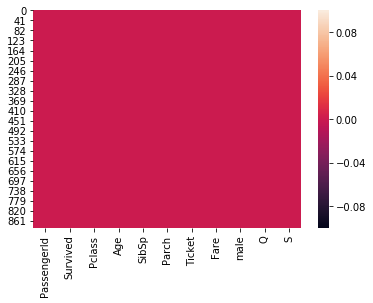

In [27]:
test.fillna(0, inplace=True)
sns.heatmap(train.isnull())

In [28]:
test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1


In [29]:
X1 = test[['Pclass', 'Fare', 'male']]

In [30]:
X1.head()

,Pclass,Fare,male
0,3,7.8292,1
1,3,7.0000,0
2,2,9.6875,1
3,3,8.6625,1
4,3,12.2875,0


In [31]:
X1.isnull().sum()

Pclass    0
Fare      0
male      0
dtype: int64

In [32]:
y_pred_test = model.predict(X1)

In [33]:
test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1


In [34]:
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':y_pred_test}).set_index('PassengerId').to_csv('Titanic_Submission_RFC.csv', float_format='%.f')